# Figure 4

In [1]:
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

from pymodulon.compare import compare_ica
from pymodulon.io import load_json_model
from pymodulon.plotting import *

## Set plotting style

In [2]:
sns.set_style('ticks')
plt.style.use('custom.mplstyle')

## Load data

In [4]:
figure_dir = '../../reports/figures/modulome/Fig4'
data_dir = path.join('../..','data','processed', 'modulome')

data_file = path.join(data_dir,'salb.json.gz')
ica_data = load_json_model(data_file)

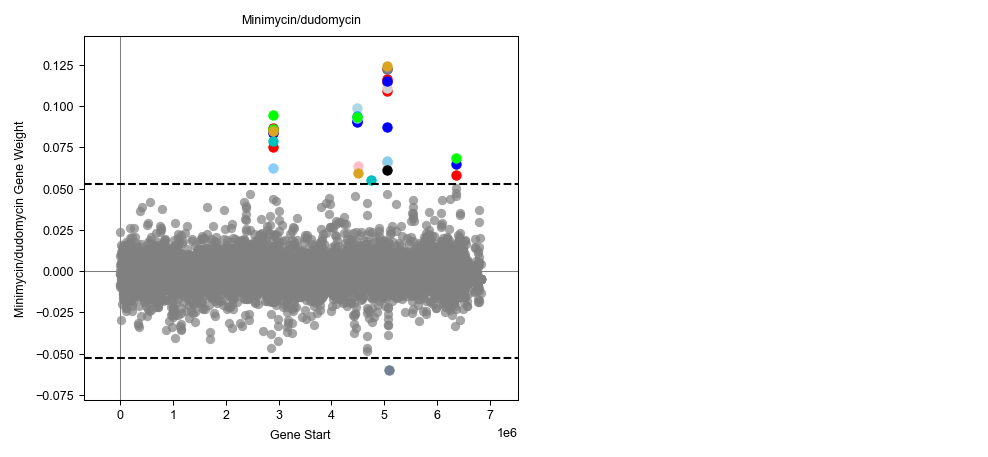

In [8]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Minimycin/dudomycin']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=False, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig(path.join(figure_dir, 'gene_weights666.svg'), dpi=300)
plt.show()

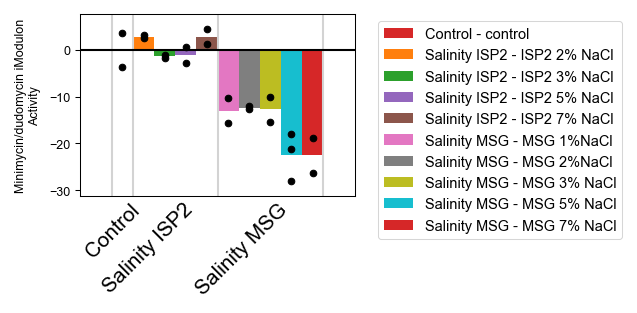

In [9]:
# Convert the page size from mm to inches
width = 60 / 25.4  # ~6.69 inches
height = 40 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

# Assuming plot_activities is modified to accept an axis object
plot_activities(ica_data, 'Minimycin/dudomycin', 
                projects=['Control', 'Salinity ISP2', 'Salinity MSG'], 
                highlight=['Control', 'Salinity ISP2', 'Salinity MSG'],
                ax=ax)  # Pass the ax object here

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

plt.savefig(path.join(figure_dir,'minimycin_activity.svg'))